# Final Project: Prediksi Klasifikasi Gaji

Oleh: [Yoga Perdana Putra](https://github.com/yogaperdana)

Data: [Link to Kaggle](https://www.kaggle.com/competitions/sanbercode-python-ds-dasar-batch18/)

## Gambaran Umum

Membuat prediksi gaji seseorang apakah kurang dari atau sama dengan 7 juta atau lebih dari 7 juta berdasarkan beberapa keterangan pada kolom-kolom dataset. Model klasifikasi dapat menentukan nilai pada kolom Gaji dengan mengubah nilainya berdasarkan ketentuan sebagai berikut:
```
0 : Gaji <= 7jt
1 : Gaji > 7jt
```

## Data

*File* `train.csv` berisi *dataset* yang memiliki kolom label digunakan untuk *traning model*, sedangkan *file* `test.csv` berisi *dataset* tanpa kolom label, yang nantinya ditambahkan kolom `Gaji` berisi prediksi sesuai ketentuan. *Dataset* baru dibuat dengan berisi kolom `id` dan kolom `Gaji` yang diambil dari *dataset test* yang telah ditambahkan prediksinya. *Dataset* baru ini dijadikan sebuah *file submission*.

### Deskripsi File

* `train.csv` - *file training set*
* `test.csv` - *file test set*
* `sample_submission.csv` - Contoh *sample submission file*

### *Data Fields*

* `id` - *id unique* yang dimiliki setiap *sample*
* `Umur` - umur yang dimiliki setiap *sample*
* `Kelas Pekerja` - kelompok kelas pekerjaan masing-masing *sample*
* `Berat Akhir` - berisi nilai akumulasi berdasarkan populasi, ras, dan gender dengan umur 16+ suatu wilayah, *sample* yang diambil dari wilayah yang memiliki karakteristik demografis yang sama akan memiliki nilai berat akhir yang sama
* `Pendidikan` - tingkat pendidikan terakhir masing-masing *sample*
* `Jmlh Tahun Pendidikan` - berisi jumlah tahun masing-masing *sample* mengenyam pendidikan
* `Status Perkawinan` - status perkawinan masing-masing *sample*
* `Pekerjaan` - pekerjaan saat ini masing-masing *sample*
* `Jenis Kelamin` - jenis kelamin masing-masing *sample*
* `Keuntungan Kapital` - keuntungan yang didapat jika *sample* menjual semua aset miliknya
* `Kerugian Kapital` - kerugian yang didapat jika *sample* menjual semua aset miliknya
* `Jam per Minggu` - jam kerja masing-masing *sample* setiap minggunya
* `Gaji` - nilai gaji masing-masing *sample* apakah kurang dari sama dengan 7jt atau lebih dari 7jt

## Evaluasi
Evaluasi matriks yang di gunakan adalah AUC, *scoring metrics* `roc_auc` harus dilakukan terhadap model yang dibuat.

## Persiapan Data

### Membaca Dataset

Terlebih dahulu memuat pustaka yang akan digunakan pada proyek ini. Kemudian masing-masing berkas csv dataset _training_ dan _test_ dibaca, lalu diubah menjadi _dataframe_ pada variabelnya tersendiri.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test_ori = df_test.copy()

Karena kolom `id` hanya merupakan angka unik untuk identifikasi setiap baris data, maka kolom tersebut dapat dihapus karena tidak akan mempengaruhi hasil nantinya.

In [2]:
df_train.drop(columns='id', inplace=True)
df_test.drop(columns='id', inplace=True)

Lihat informasi mengenai _dataframe training & test set_:

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35994 entries, 0 to 35993
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Umur                   35994 non-null  int64  
 1   Kelas Pekerja          35994 non-null  object 
 2   Berat Akhir            35994 non-null  int64  
 3   Pendidikan             35994 non-null  object 
 4   Jmlh Tahun Pendidikan  35994 non-null  int64  
 5   Status Perkawinan      35994 non-null  object 
 6   Pekerjaan              35994 non-null  object 
 7   Jenis Kelamin          35994 non-null  object 
 8   Keuntungan Kapital     35994 non-null  float64
 9   Kerugian Capital       35994 non-null  float64
 10  Jam per Minggu         35994 non-null  float64
 11  Gaji                   35994 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 3.3+ MB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9599 entries, 0 to 9598
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Umur                   9599 non-null   int64  
 1   Kelas Pekerja          9599 non-null   object 
 2   Berat Akhir            9599 non-null   int64  
 3   Pendidikan             9599 non-null   object 
 4   Jmlh Tahun Pendidikan  9599 non-null   int64  
 5   Status Perkawinan      9599 non-null   object 
 6   Pekerjaan              9599 non-null   object 
 7   Jenis Kelamin          9599 non-null   object 
 8   Keuntungan Kapital     9599 non-null   float64
 9   Kerugian Capital       9599 non-null   float64
 10  Jam per Minggu         9599 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 825.0+ KB


Memeriksa isi _dataframe training & test set_ secara singkat untuk 5 baris teratas dan terbawah:

In [5]:
display(df_train)

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,21,Wiraswasta,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,<=7jt
1,49,Wiraswasta,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,<=7jt
2,44,Wiraswasta,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,>7jt
3,24,Wiraswasta,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,<=7jt
4,33,Wiraswasta,219619,Master,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,>7jt
...,...,...,...,...,...,...,...,...,...,...,...,...
35989,47,Pekerja Bebas Bukan Perusahan,148169,SMA,9,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,40.0,<=7jt
35990,69,Pekerja Bebas Perusahaan,264722,D3,12,Menikah,Sales,Laki2,0.0,0.0,40.0,>7jt
35991,24,Pekerja Bebas Bukan Perusahan,31606,Sarjana,13,Menikah,Spesialis,Perempuan,0.0,0.0,20.0,>7jt
35992,47,Wiraswasta,197836,SMA,9,Menikah,Sales,Laki2,0.0,0.0,45.0,<=7jt


In [6]:
display(df_test)

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,30,Pemerintah Lokal,99761,D4,11,Cerai,Pemuka Agama,Perempuan,0.0,0.0,40.0
1,28,Wiraswasta,202206,SMA,9,Menikah,Mesin Inspeksi,Laki2,0.0,0.0,50.0
2,34,Pemerintah Provinsi,199934,Pendidikan Tinggi,10,Menikah,Pemuka Agama,Laki2,0.0,0.0,40.0
3,51,Wiraswasta,373448,Pendidikan Tinggi,10,Menikah,Ekesekutif Managerial,Laki2,0.0,28028000.0,40.0
4,20,?,144685,Pendidikan Tinggi,10,Belum Pernah Menikah,?,Perempuan,0.0,22428000.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...
9594,58,Pemerintah Negara,159021,9th,5,Menikah,Petani,Laki2,0.0,0.0,40.0
9595,45,Pekerja Bebas Bukan Perusahan,144086,11th,7,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,50.0
9596,20,Wiraswasta,238685,Pendidikan Tinggi,10,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,32.0
9597,41,Pemerintah Lokal,249039,SMA,9,Berpisah,Pemuka Agama,Perempuan,0.0,0.0,40.0


### Cek Data Kosong/Hilang

Dari ringkasan informasi di atas terlihat bahwa _dataset_ tidak memiliki data yang hilang karena jumlah baris pada tiap kolom berjumlah sama dengan total baris secara keseluruhan. Namun untuk memastikan lagi, dapat dilakukan dengan cara pengecekan berikut ini:

In [7]:
df_train.isna().sum()

Umur                     0
Kelas Pekerja            0
Berat Akhir              0
Pendidikan               0
Jmlh Tahun Pendidikan    0
Status Perkawinan        0
Pekerjaan                0
Jenis Kelamin            0
Keuntungan Kapital       0
Kerugian Capital         0
Jam per Minggu           0
Gaji                     0
dtype: int64

In [8]:
df_test.isna().sum()

Umur                     0
Kelas Pekerja            0
Berat Akhir              0
Pendidikan               0
Jmlh Tahun Pendidikan    0
Status Perkawinan        0
Pekerjaan                0
Jenis Kelamin            0
Keuntungan Kapital       0
Kerugian Capital         0
Jam per Minggu           0
dtype: int64

### Cek Duplikasi Data

Perlu dilakukan pemeriksaan terhadap data duplikat pada dataset latih agar tidak perlu memproses baris data yang sama lagi:

In [9]:
original_rows_count = df_train.shape[0]

print('Total baris data:', original_rows_count)
print('Jumlah data duplikat:', sum(df_train.duplicated()))

Total baris data: 35994
Jumlah data duplikat: 38


Menampilkan sampel data duplikat yang terdeteksi:

In [10]:
display(df_train[df_train.duplicated()].sort_values(df_train.columns.values.tolist()).head(10))

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
16126,19,?,167428,Pendidikan Tinggi,10,Belum Pernah Menikah,?,Laki2,0.0,0.0,40.0,<=7jt
24854,19,Wiraswasta,138153,Pendidikan Tinggi,10,Belum Pernah Menikah,Pemuka Agama,Perempuan,0.0,0.0,10.0,<=7jt
32538,19,Wiraswasta,277695,SD,1,Belum Pernah Menikah,Petani,Laki2,0.0,0.0,36.0,<=7jt
26407,19,Wiraswasta,318822,SMA,9,Belum Pernah Menikah,Pemuka Agama,Perempuan,0.0,0.0,40.0,<=7jt
12023,20,?,38455,SMA,9,Belum Pernah Menikah,?,Laki2,0.0,0.0,40.0,<=7jt
29875,20,?,203353,Pendidikan Tinggi,10,Belum Pernah Menikah,?,Perempuan,0.0,0.0,40.0,<=7jt
33651,20,Wiraswasta,107658,Pendidikan Tinggi,10,Belum Pernah Menikah,Tech-support,Perempuan,0.0,0.0,10.0,<=7jt
35958,21,Wiraswasta,138768,Pendidikan Tinggi,10,Belum Pernah Menikah,Sales,Laki2,0.0,0.0,40.0,<=7jt
20121,21,Wiraswasta,151158,Pendidikan Tinggi,10,Belum Pernah Menikah,Spesialis,Perempuan,0.0,0.0,25.0,<=7jt
14368,21,Wiraswasta,243368,SD,1,Belum Pernah Menikah,Petani,Laki2,0.0,0.0,50.0,<=7jt


Menghapus duplikat dan memeriksa perubahan jumlah baris data setelahnya:

In [11]:
df_train.drop_duplicates(inplace=True)

print('Jumlah duplikat sekarang:', sum(df_train.duplicated()))
print('Total baris data sekarang:', df_train.shape[0])
print('Jumlah baris yang terhapus:', (original_rows_count - df_train.shape[0]))

Jumlah duplikat sekarang: 0
Total baris data sekarang: 35956
Jumlah baris yang terhapus: 38


## Analisis Eksplorasi Data

Melakukan analisa terhadap data yang akan dijelajahi, diantaranya yaitu melihat statistik data untuk fitur-fitur numerik maupun kategorikal dan kemudian memvisualisasikannya dalam bentuk grafik agar dapat diketahui bentuk dan sebaran datanya.

### Data Fitur Numerik

Tabel berikut merupakan statistik data kolom-kolom dengan nilai numerik untuk dataset _training_:

In [12]:
with pd.option_context('display.float_format', lambda x: '{:,.2f}'.format(x)):
    display(df_train.describe().T)

,count,mean,std,min,25%,50%,75%,max
Umur,"35,956.00",38.67,13.67,17.00,28.00,37.00,48.00,90.00
Berat Akhir,"35,956.00","189,942.93","105,814.27","12,285.00","117,772.25","178,466.50","237,903.00","1,490,400.00"
Jmlh Tahun Pendidikan,"35,956.00",10.08,2.57,1.00,9.00,10.00,12.00,16.00
Keuntungan Kapital,"35,956.00","15,055,129.10","103,045,146.32",0.00,0.00,0.00,0.00,"1,399,986,000.00"
Kerugian Capital,"35,956.00","1,219,260.76","5,634,380.09",0.00,0.00,0.00,0.00,"60,984,000.00"
Jam per Minggu,"35,956.00",40.44,12.37,1.00,40.00,40.00,45.00,99.00


Tabel berikut merupakan statistik data kolom-kolom dengan nilai numerik untuk dataset _test_:

In [13]:
with pd.option_context('display.float_format', lambda x: '{:,.2f}'.format(x)):
    display(df_test.describe().T)

,count,mean,std,min,25%,50%,75%,max
Umur,"9,599.00",38.45,13.78,17.00,28.00,37.00,48.00,90.00
Berat Akhir,"9,599.00","189,996.73","106,418.62","13,769.00","116,620.00","177,858.00","237,997.50","1,455,435.00"
Jmlh Tahun Pendidikan,"9,599.00",10.05,2.55,1.00,9.00,10.00,12.00,16.00
Keuntungan Kapital,"9,599.00","14,890,179.19","104,115,392.83",0.00,0.00,0.00,0.00,"1,399,986,000.00"
Kerugian Capital,"9,599.00","1,252,761.54","5,714,040.72",0.00,0.00,0.00,0.00,"60,984,000.00"
Jam per Minggu,"9,599.00",40.33,12.40,1.00,40.00,40.00,45.00,99.00


Dari data-data di atas, dapat ditemukan beberapa analisa sebagai berikut:

*   Rata-rata umur sampel pekerja ada di kisaran 38 tahun, namun nampaknya ada yang sampai umur 90 tahun.
*   Pada berat akhir, nilai kuartil 3 masih sangat jauh dengan nilai terbesar yang ada pada data.
*   Pada kolom keuntungan kapital dan kerugian capital, nampaknya banyak sekali yang memiliki nilai 0 dan nilai maksimum/terbesarnya terlalu tinggi.

Mengumpulkan nama fitur numerik dari masing-masing dataset ke dalam variabel tersendiri:

In [14]:
train_num_cols = df_train.select_dtypes(include='number').columns.tolist()
test_num_cols = df_test.select_dtypes(include='number').columns.tolist()

print('Fitur numerik dataset training:\n', train_num_cols)
print('Fitur numerik dataset test:\n', test_num_cols)

Fitur numerik dataset training:
 ['Umur', 'Berat Akhir', 'Jmlh Tahun Pendidikan', 'Keuntungan Kapital', 'Kerugian Capital', 'Jam per Minggu']
Fitur numerik dataset test:
 ['Umur', 'Berat Akhir', 'Jmlh Tahun Pendidikan', 'Keuntungan Kapital', 'Kerugian Capital', 'Jam per Minggu']


Berikutnya, persebaran data untuk kolom numerik dapat dilihat dengan melakukan visualisasi dalam bentuk grafik histogram dan _boxplot_ untuk rentang datanya. Karena yang akan diproses adalah dataset _training_, maka hanya perlu meembuat grafik untuk _training set_ saja.

In [15]:
def graph_num(df, col, unit=None):
    fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4, 1]}, figsize=(12, 4), tight_layout=True)
    fig.suptitle(col, fontsize='large', fontweight='bold', family='monospace')

    sns.histplot(df[col], ax=ax[0], kde=True)
    ax[0].set_xticks(ax[0].get_xticks())
    ax[0].set_xticklabels(['{:,.0f}'.format(x).replace(",", ".") for x in ax[0].get_xticks()])
    ax[0].set_xlabel('' if unit == None else unit, family='monospace')
    ax[0].set_ylabel('Densitas', family='monospace')
    ax[0].margins(x=0)

    sns.boxplot(ax=ax[1], x='Gaji', y=col, data=df, showmeans=True)
    ax[1].set_yticks(ax[1].get_yticks())
    ax[1].set_yticklabels(['{:,.0f}'.format(x).replace(",", ".") for x in ax[1].get_yticks()])
    ax[1].set_xlabel('Target', family='monospace')
    ax[1].set_ylabel('' if unit == None else unit, family='monospace')
    ax[1].margins(y=0)

    plt.xticks(family='monospace')
    plt.yticks(family='monospace')
    plt.show()

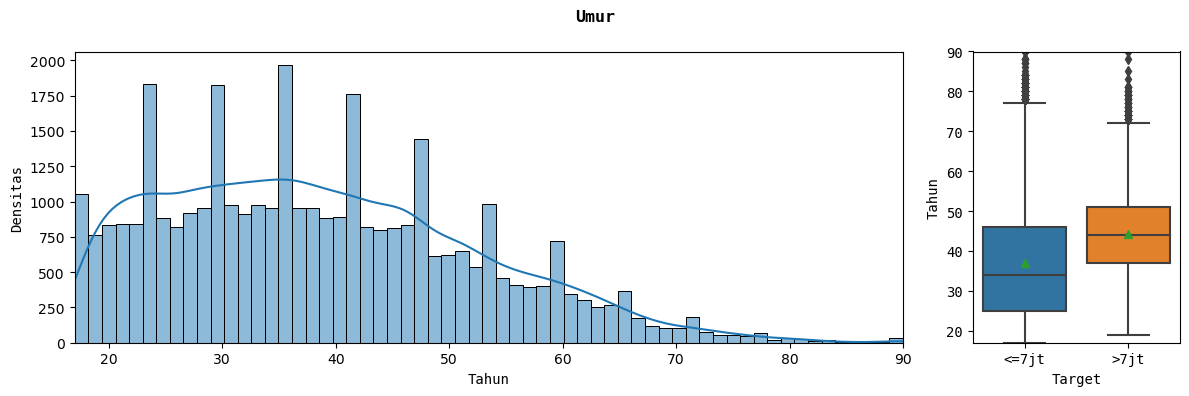

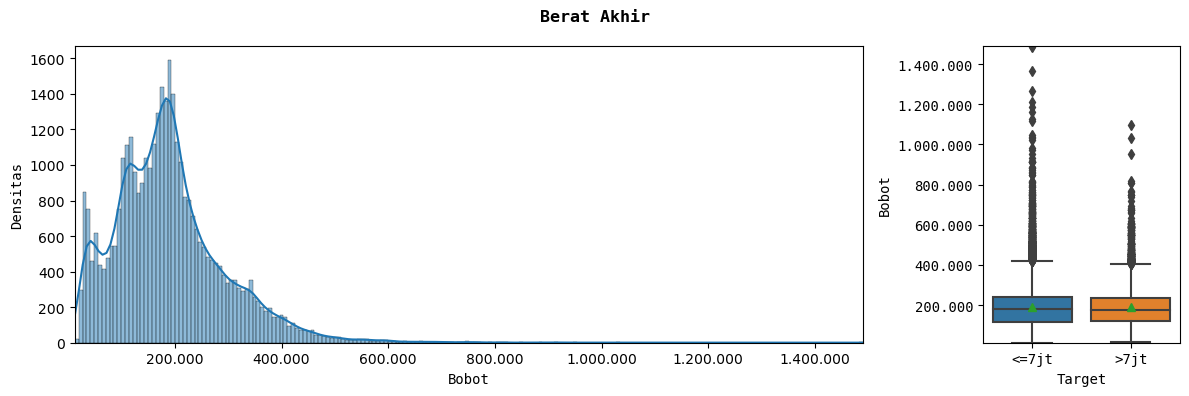

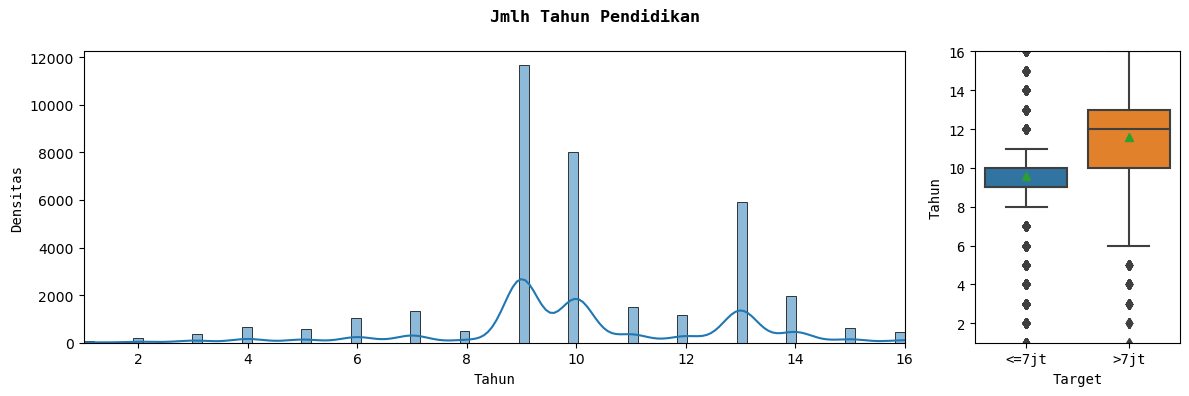

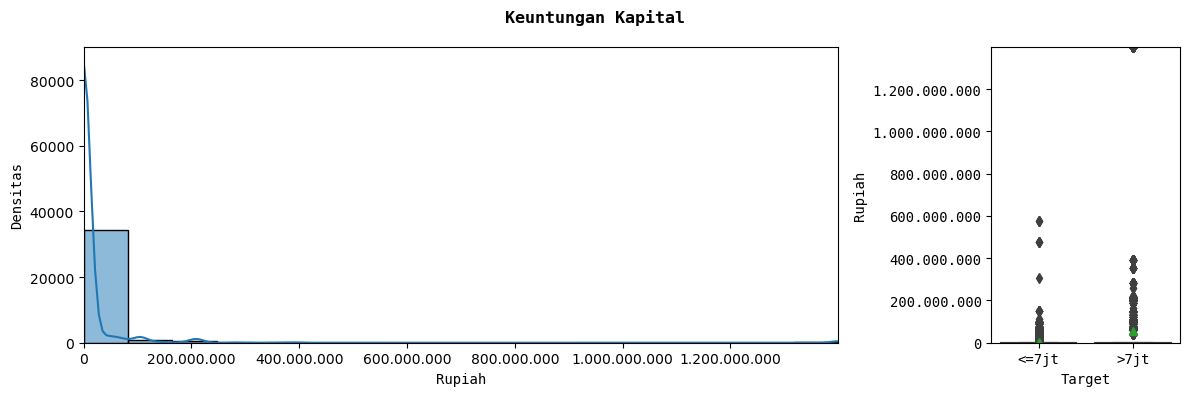

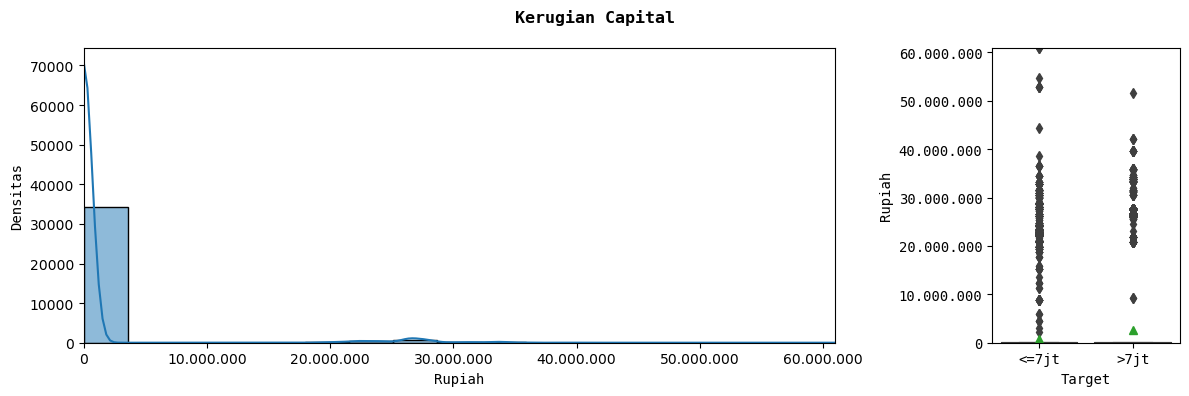

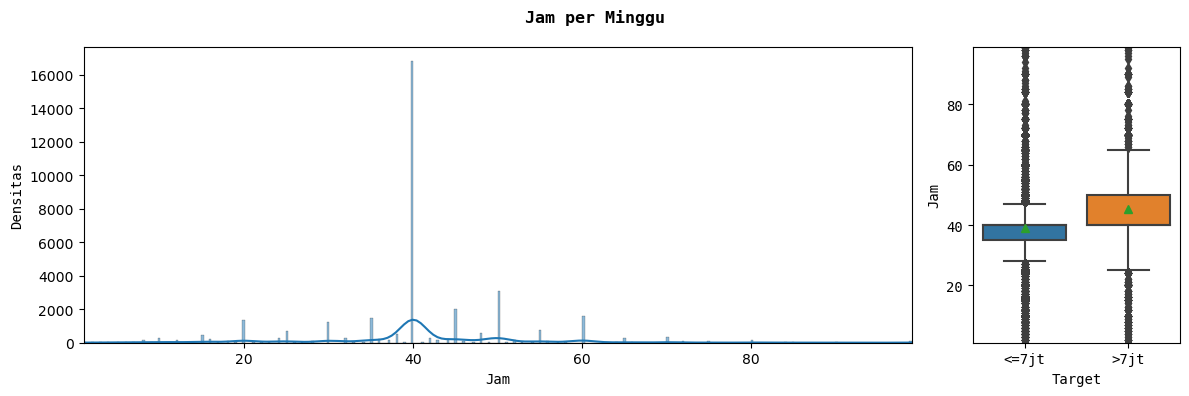

In [16]:
units = ['Tahun', 'Bobot', 'Tahun', 'Rupiah', 'Rupiah', 'Jam']
for n, col in enumerate(train_num_cols):
    graph_num(df_train, col, units[n])

Dari grafik di atas, dapat ditemukan beberapa analisa berikut ini:

*   Umur: Dari _boxplot_ terlihat bahwa rentang atas data observasi berada pada usia 70-80 tahun dengan nilai maksimum pada seluruh data adalah 90.
*   Berat Akhir: Distribusi data cenderung miring ke kiri (_negative skewness_) dengan banyak _outliers_ terdeteksi di atas nilai 400.000-an.
*   Jmlh Tahun Pendidikan: Banyak data pada nilai 9, 10 dan 13 namun jika mengacu pada konteks, nilai yang lain masih meragukan jika mau disebut sebagai _outlier_. Dari _boxplot_ terlihat bahwa yang memiliki pendidikan di bawah 10 tahun maka banyak yang gajinya berada di bawah 7 juta. Sebaliknya jika pendidikannya di atas 10 tahun maka banyak yang gajinya di atas 7 juta.
*   Keuntungan Kapital: Banyak sekali data sampel pekerja yang tidak memiliki keuntungan atau nilainya hanya 0. Nilai maksimumnya terdeteksi sangat jauh sekali dan dapat dianggap sebagai nilai ekstrim.
*   Kerugian Capital: Sama seperti keuntungan kapital, banyak yang nilainya 0 atau tidak memiliki kerugian. Namun tidak sedikit pula yang memiliki nilai tinggi sehingga grafik menggambarkan semuanya yang di atas 0 sebagai _outlier_.
*   Jam per Minggu: Banyak sampel pekerja yang terdata memiliki jam kerja sebanyak 40 jam per minggu dengan persebaran data yang sangat panjang baik pada distribusi nilai bawah maupun atas median.

Dari analisa tersebut, maka untuk memproses penghapusan data _outliers_ nampaknya akan sangat banyak mengurangi jumlah data yang akan dilatih untuk membuat model prediksinya sehingga perlu banyak percobaan data mana saja yang dibiarkan saja dan mana yang harus dikurangi.

### Data Fitur Kategorikal

Pada kedua dataset, kolom yang memiliki tipe data _object_ perlu diubah terlebih dahulu menjadi _category_.

In [17]:
train_obj_cols = df_train.select_dtypes(include='object').columns.tolist()
test_obj_cols = df_test.select_dtypes(include='object').columns.tolist()

print('Kolom dengan tipe data objek pada dataset training:\n', train_obj_cols)
print('Kolom dengan tipe data objek pada dataset test:\n', test_obj_cols)

for col in train_obj_cols:
    df_train[col] = df_train[col].astype('category')
for col in test_obj_cols:
    df_test[col] = df_test[col].astype('category')

Kolom dengan tipe data objek pada dataset training:
 ['Kelas Pekerja', 'Pendidikan', 'Status Perkawinan', 'Pekerjaan', 'Jenis Kelamin', 'Gaji']
Kolom dengan tipe data objek pada dataset test:
 ['Kelas Pekerja', 'Pendidikan', 'Status Perkawinan', 'Pekerjaan', 'Jenis Kelamin']


Periksa lagi perubahannya dengan menampilkan informasi _dataframe_:

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35956 entries, 0 to 35993
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Umur                   35956 non-null  int64   
 1   Kelas Pekerja          35956 non-null  category
 2   Berat Akhir            35956 non-null  int64   
 3   Pendidikan             35956 non-null  category
 4   Jmlh Tahun Pendidikan  35956 non-null  int64   
 5   Status Perkawinan      35956 non-null  category
 6   Pekerjaan              35956 non-null  category
 7   Jenis Kelamin          35956 non-null  category
 8   Keuntungan Kapital     35956 non-null  float64 
 9   Kerugian Capital       35956 non-null  float64 
 10  Jam per Minggu         35956 non-null  float64 
 11  Gaji                   35956 non-null  category
dtypes: category(6), float64(3), int64(3)
memory usage: 2.1 MB


In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9599 entries, 0 to 9598
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Umur                   9599 non-null   int64   
 1   Kelas Pekerja          9599 non-null   category
 2   Berat Akhir            9599 non-null   int64   
 3   Pendidikan             9599 non-null   category
 4   Jmlh Tahun Pendidikan  9599 non-null   int64   
 5   Status Perkawinan      9599 non-null   category
 6   Pekerjaan              9599 non-null   category
 7   Jenis Kelamin          9599 non-null   category
 8   Keuntungan Kapital     9599 non-null   float64 
 9   Kerugian Capital       9599 non-null   float64 
 10  Jam per Minggu         9599 non-null   float64 
dtypes: category(5), float64(3), int64(3)
memory usage: 499.0 KB


Tabel berikut merupakan statistik data kolom-kolom dengan nilai kategorikal untuk dataset _training_:

In [20]:
display(df_train.describe(include=['category']).T)

,count,unique,top,freq
Kelas Pekerja,35956,9,Wiraswasta,24915
Pendidikan,35956,16,SMA,11653
Status Perkawinan,35956,6,Menikah,16551
Pekerjaan,35956,15,Spesialis,4584
Jenis Kelamin,35956,2,Laki2,24067
Gaji,35956,2,<=7jt,27330


Tabel berikut merupakan statistik data kolom-kolom dengan nilai kategorikal untuk dataset _test_:

In [21]:
display(df_test.describe(include=['category']).T)

,count,unique,top,freq
Kelas Pekerja,9599,9,Wiraswasta,6714
Pendidikan,9599,16,SMA,3090
Status Perkawinan,9599,6,Menikah,4333
Pekerjaan,9599,15,Perbaikan Kerajinan,1205
Jenis Kelamin,9599,2,Laki2,6380


Menampilkan nilai unik pada data fitur kategorikal _training set_:

In [22]:
train_cat_cols = df_train.select_dtypes(include='category').columns.tolist()

for i in range(len(train_cat_cols)):
    list_unique = df_train[train_cat_cols[i]].unique()
    print(f"{train_cat_cols[i]} ({len(list_unique)}):\n {np.sort(list_unique)}", end='\n\n')

Kelas Pekerja (9):
 ['?' 'Pekerja Bebas Bukan Perusahan' 'Pekerja Bebas Perusahaan'
 'Pemerintah Lokal' 'Pemerintah Negara' 'Pemerintah Provinsi'
 'Tanpa di Bayar' 'Tidak Pernah Bekerja' 'Wiraswasta']

Pendidikan (16):
 ['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'D3' 'D4'
 'Doktor' 'Master' 'Pendidikan Tinggi' 'SD' 'SMA' 'Sarjana'
 'Sekolah Professional']

Status Perkawinan (6):
 ['Belum Pernah Menikah' 'Berpisah' 'Cerai' 'Janda' 'Menikah' 'Menikah LDR']

Pekerjaan (15):
 ['?' 'Asisten Rumah Tangga' 'Ekesekutif Managerial' 'Mesin Inspeksi'
 'Pembersih' 'Pemuka Agama' 'Penjaga' 'Perbaikan Kerajinan' 'Petani'
 'Sales' 'Servis Lainnya' 'Spesialis' 'Supir' 'Tech-support' 'Tentara']

Jenis Kelamin (2):
 ['Laki2' 'Perempuan']

Gaji (2):
 ['<=7jt' '>7jt']



Menampilkan nilai unik pada data fitur kategorikal _test set_:

In [23]:
test_cat_cols = df_test.select_dtypes(include='category').columns.tolist()

for i in range(len(test_cat_cols)):
    list_unique = df_test[test_cat_cols[i]].unique()
    print(f"{test_cat_cols[i]} ({len(list_unique)}):\n {np.sort(list_unique)}", end='\n\n')

Kelas Pekerja (9):
 ['?' 'Pekerja Bebas Bukan Perusahan' 'Pekerja Bebas Perusahaan'
 'Pemerintah Lokal' 'Pemerintah Negara' 'Pemerintah Provinsi'
 'Tanpa di Bayar' 'Tidak Pernah Bekerja' 'Wiraswasta']

Pendidikan (16):
 ['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'D3' 'D4'
 'Doktor' 'Master' 'Pendidikan Tinggi' 'SD' 'SMA' 'Sarjana'
 'Sekolah Professional']

Status Perkawinan (6):
 ['Belum Pernah Menikah' 'Berpisah' 'Cerai' 'Janda' 'Menikah' 'Menikah LDR']

Pekerjaan (15):
 ['?' 'Asisten Rumah Tangga' 'Ekesekutif Managerial' 'Mesin Inspeksi'
 'Pembersih' 'Pemuka Agama' 'Penjaga' 'Perbaikan Kerajinan' 'Petani'
 'Sales' 'Servis Lainnya' 'Spesialis' 'Supir' 'Tech-support' 'Tentara']

Jenis Kelamin (2):
 ['Laki2' 'Perempuan']



Dari data-data di atas, dapat ditemukan beberapa analisa sebagai berikut:
*   Terdapat kategori yang tidak diketahui (dengan karakter tanda tanya). Perlu dilakukan permodelan ulang untuk mengetahui pengaruh akurasi data nantinya jika kategori tanda tanya tersebut dihapus atau tetap dipakai.
*   Pada kolom `Pendidikan`, terdapat kata/nilai yang rancu sehingga mungkin perlu disesuaikan menjadi satu kategori yang sama, yaitu:
    *   1st-4th, 5th-6th &rarr; SD?
    *   7th-8th, 9th &rarr; SMP?
    *   10th, 11th, 12th &rarr; SMA?
    *   **Pendidikan Tinggi**? &rarr; Termasuk D3, D4, Sarjana, Master, Doktor &rarr; coba diabaikan dulu
*   Pada kolom `Status Perkawinan`, terdapat kata ambigu sehingga mungkin perlu disesuaikan menjadi satu kategori yang sama, yaitu:
    *   Cerai, Berpisah dan Janda
    *   Menikah dan Menikah LDR
*   Penyesuaian kata rancu/ambigu membutuhkan evaluasi terhadap model prediksi nantinya apakah lebih akurat saat sudah diubah atau menggunakan kategori aslinya.

Berikutnya, persebaran data untuk kolom kategorikal dapat dilihat dengan melakukan visualisasi dalam bentuk grafik diagram batang. Karena yang akan diproses adalah dataset _training_, maka hanya perlu meembuat grafik untuk _training set_ saja.

In [24]:
def graph_cat(df, col):
    fig = plt.figure(figsize=(5, 0.5 * df[col].nunique()))
    ax = sns.countplot(y=col, data=df)
    plt.title(col, fontsize='large', fontweight='bold', family='monospace')
    plt.xlabel('Total', family='monospace')
    plt.ylabel('Kategori', family='monospace')
    plt.xticks(family='monospace')
    plt.yticks(family='monospace')

    col_half = df[col].value_counts().max() / 2
    for i, p in enumerate(ax.patches):
        if p.get_width() < col_half:
            x_text, align, color = 5, 'left', 'black'
        else:
            x_text, align, color = -5, 'right', 'white'
        ax.annotate(str('{:,.0f}'.format(p.get_width()).replace(",", ".")), 
                    xy=(p.get_width(), p.get_y() + p.get_height() / 2), 
                    textcoords="offset points", xytext=(x_text, -3.5), ha=align, 
                    color=color, family='monospace')
    
    plt.show()

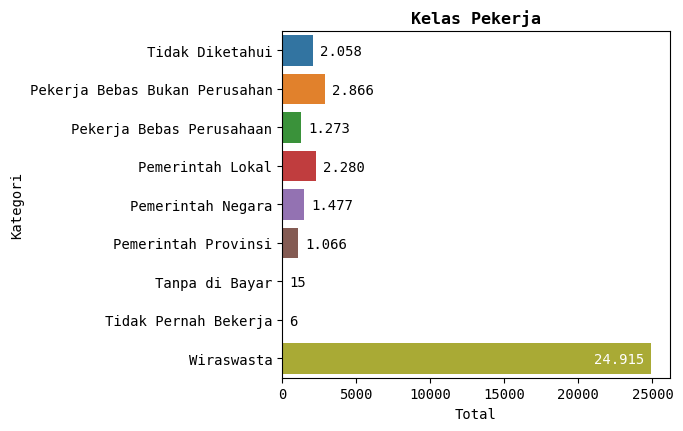

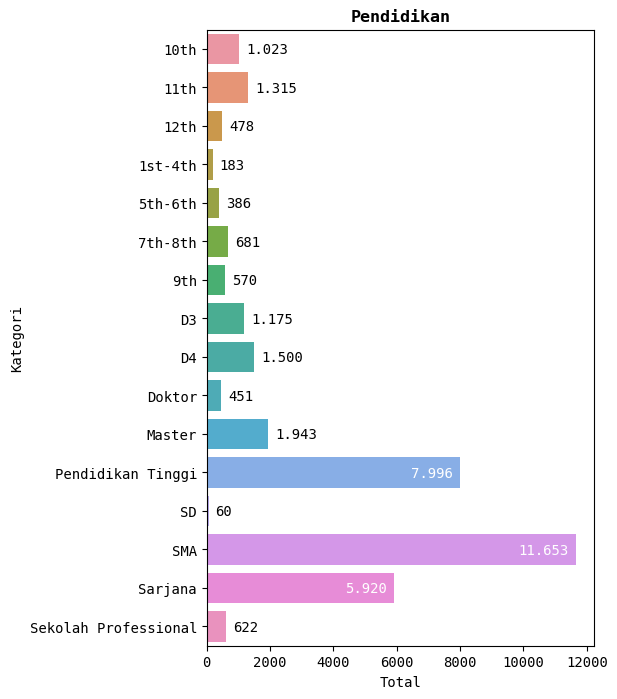

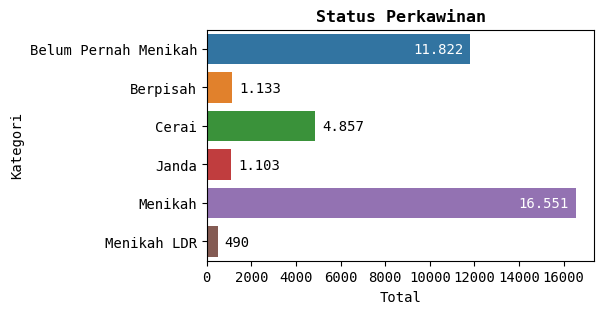

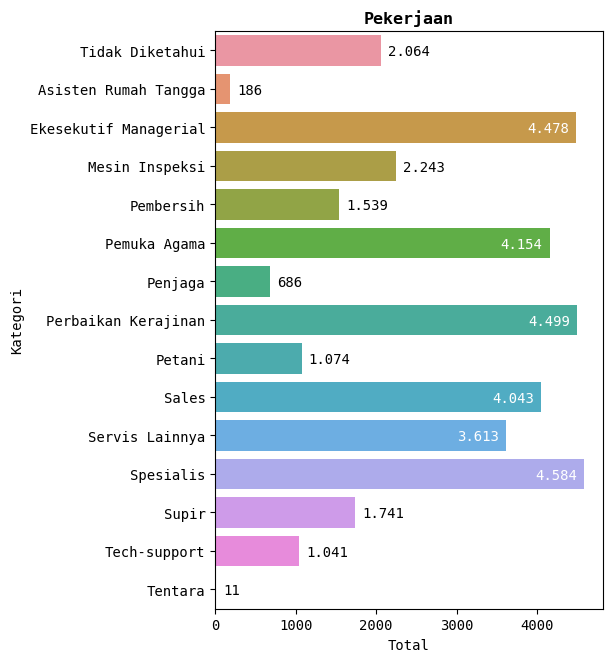

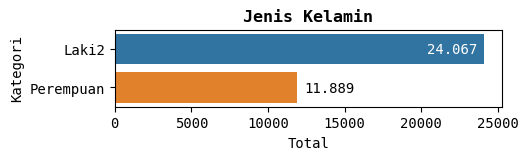

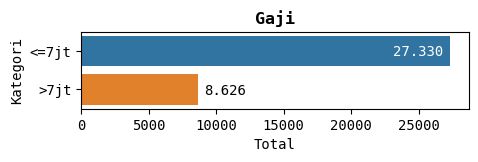

In [25]:
df_train['Kelas Pekerja'] = df_train['Kelas Pekerja'].replace('?', 'Tidak Diketahui')
df_train['Pekerjaan'] = df_train['Pekerjaan'].replace('?', 'Tidak Diketahui')

for col in train_cat_cols:
    graph_cat(df_train, col)

Dari grafik di atas, dapat ditemukan beberapa analisa berikut ini:

*   Kategori "tanya tanya" (?) atau nilai yang tidak diketahui pada kolom Kelas Pekerja dan Pekerjaan terdapat cukup banyak sehingga belum bisa dianggap sebagai data yang tidak penting. Untuk sementara tetap dijadikan suatu kategori sendiri.
*   Lebih banyak sampel data pekerja yang memiliki jenis kelamin laki-laki dan gajinya di bawah 7 juta.

## Persiapan Pemrosesan Data

Sebelum data diproses untuk membuat sebuah permodelan prediksi, perlu dilakukan penyesuaian kembali terhadap label data dan standarisasi isi data.

### Konversi Ke Data Ordinal

Mengubah kata unik pada data fitur kategorikal menjadi nilai ordinal, sehingga sebuah kata menjadi angka yang dapat mewakili kategori tersebut.

Untuk fitur target pada dataset _training_, yaitu kolom `Gaji`, harus dilakukan konversi manual karena harus sesuai dengan ketentuan di awal.

Konversi menggunakan fungsi `get_dummies()` yang mengubah variabel kategorikal menjadi variabel numerikal dengan melakukan proses _One Hot Encode_. _One Hot Encode_ adalah proses untuk membuat kolom baru dari variabel kategorikal dimana setiap kategori menjadi kolom baru dengan nilai 0 atau 1 (0 mewakili tidak ada dan 1 mewakili ada).

> Catatan:<br>
> Dilakukan perbandingan antara menggunakan `LabelEncoder` dan `OneHotEncoding` (ekuivalen dengan pendekatan `get_dummies()`)<br>
> Namun dari percobaan lain, penggunaan metode _one hot encode_ telah meningkatkan skor ROC AUC daripada menggunakan metode _label encoder_.

In [26]:
# from sklearn.preprocessing import LabelEncoder

# for c in train_cat_cols:
#     if (c == 'Gaji'):
#         df_train['Gaji'] = df_train['Gaji'].replace({ '<=7jt': 0, '>7jt': 1 })
#     else:
#         df_train[c] = LabelEncoder().fit_transform(df_train[c])

# for c in test_cat_cols:
#     df_test[c] = LabelEncoder().fit_transform(df_test[c])

In [27]:
train_cat_features = train_cat_cols.copy()
train_cat_features.remove('Gaji')

df_train['Gaji'] = df_train['Gaji'].replace({ '<=7jt': 0, '>7jt': 1 })

df_train_dum = pd.get_dummies(df_train, columns=train_cat_features, prefix_sep=' - ', drop_first=True)
df_test_dum = pd.get_dummies(df_test, columns=test_cat_cols, prefix_sep=' - ', drop_first=True)

### Pemisahan Dataset Latih

Sebelum melakukan permodelan dan prediksi, dataset latih terlebih dahulu dipisah sekitar sepertiganya untuk validasi keakurasian model (_test set_ baru dari dataset yang telah memiliki label target). Fitur masukan (_input_) harus dipisahkan dari fitur target, yaitu kolom `Gaji`. Fitur masukan ditentukan sebagai variabel $x$ dan fitur target sebagai variabel $y$.

In [28]:
from sklearn.model_selection import train_test_split

x = df_train_dum.drop(columns='Gaji')
y = df_train_dum['Gaji']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=1, stratify=y)

print('Original data frame size:', df_train_dum.shape)
print('Splitted training set size:', x_train.shape)
print('Validation set size:', x_val.shape)

Original data frame size: (35956, 50)
Splitted training set size: (24090, 49)
Validation set size: (11866, 49)


### Standarisasi Data Kontinu

Karena prediksi data berjenis klasifikasi, maka perlu dilakukan standarisasi data agar distribusi data menjadi normal (rata-rata mendekati 0 dan standar deviasi mendekati 1). Standarisasi menggunakan `StandardScaler`.

> Catatan: Jika target prediksi bersifat regresi, maka dilakukan normalisasi menggunakan `Normalizer`.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = x_train.copy()
x_val_scaled = x_val.copy()
x_test_scaled = df_test_dum.copy()

x_train_scaled[train_num_cols] = scaler.fit_transform(x_train[train_num_cols])
x_val_scaled[train_num_cols] = scaler.transform(x_val[train_num_cols])
x_test_scaled[train_num_cols] = scaler.transform(df_test[train_num_cols])

### Pemeriksaan Paska Pemrosesan

Periksa sekali lagi _dataframe_ yang telah disesuaikan dengan melihat informasi dataset dan sampel data.

In [30]:
display(x_train_scaled.sample(n=10))

,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Kelas Pekerja - Pekerja Bebas Bukan Perusahan,Kelas Pekerja - Pekerja Bebas Perusahaan,Kelas Pekerja - Pemerintah Lokal,Kelas Pekerja - Pemerintah Negara,...,Pekerjaan - Penjaga,Pekerjaan - Perbaikan Kerajinan,Pekerjaan - Petani,Pekerjaan - Sales,Pekerjaan - Servis Lainnya,Pekerjaan - Spesialis,Pekerjaan - Supir,Pekerjaan - Tech-support,Pekerjaan - Tentara,Jenis Kelamin - Perempuan
16672,1.857665,-1.174626,-0.414877,0.866639,-0.211393,0.375468,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5017,-0.559752,-0.984834,-0.414877,-0.146047,-0.211393,-0.030026,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35941,-1.365557,0.350647,-0.414877,-0.146047,-0.211393,0.375468,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2148,0.758839,-0.130013,-0.414877,-0.146047,-0.211393,-0.030026,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8260,1.711155,-0.588456,1.522695,-0.146047,-0.211393,0.618765,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34585,-1.365557,0.216684,-0.414877,-0.146047,-0.211393,-1.652002,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9159,-0.339987,-0.989646,-0.027362,-0.146047,-0.211393,-0.030026,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11815,1.930920,0.549368,1.135181,1.325525,-0.211393,-0.030026,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20746,1.198369,0.204714,-0.414877,-0.146047,-0.211393,-0.030026,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
13008,0.758839,-0.398512,-0.414877,-0.146047,-0.211393,-0.030026,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
display(x_val_scaled.sample(n=10))

,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Kelas Pekerja - Pekerja Bebas Bukan Perusahan,Kelas Pekerja - Pekerja Bebas Perusahaan,Kelas Pekerja - Pemerintah Lokal,Kelas Pekerja - Pemerintah Negara,...,Pekerjaan - Penjaga,Pekerjaan - Perbaikan Kerajinan,Pekerjaan - Petani,Pekerjaan - Sales,Pekerjaan - Servis Lainnya,Pekerjaan - Spesialis,Pekerjaan - Supir,Pekerjaan - Tech-support,Pekerjaan - Tentara,Jenis Kelamin - Perempuan
30716,0.685584,0.022258,-0.414877,-0.146047,-0.211393,-1.652002,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
27409,2.516960,-1.104829,-0.027362,-0.146047,-0.211393,-2.462990,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31873,-0.193477,-0.809385,-0.414877,-0.146047,-0.211393,-0.030026,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
30712,0.026288,0.190992,-0.414877,-0.146047,-0.211393,-0.030026,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
18271,0.026288,0.384062,-0.414877,-0.146047,-0.211393,-0.030026,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32801,-0.559752,-0.366821,1.522695,-0.146047,-0.211393,-1.246508,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5536,-1.365557,1.520332,-0.027362,-0.146047,-0.211393,-0.922113,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
35160,1.711155,0.115337,-0.027362,-0.146047,-0.211393,-0.030026,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12310,0.099544,0.199911,-1.577420,-0.146047,-0.211393,-0.030026,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4768,-0.120222,0.090793,1.135181,-0.146047,-0.211393,0.780962,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [32]:
display(x_test_scaled.sample(n=10))

,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Kelas Pekerja - Pekerja Bebas Bukan Perusahan,Kelas Pekerja - Pekerja Bebas Perusahaan,Kelas Pekerja - Pemerintah Lokal,Kelas Pekerja - Pemerintah Negara,...,Pekerjaan - Penjaga,Pekerjaan - Perbaikan Kerajinan,Pekerjaan - Petani,Pekerjaan - Sales,Pekerjaan - Servis Lainnya,Pekerjaan - Spesialis,Pekerjaan - Supir,Pekerjaan - Tech-support,Pekerjaan - Tentara,Jenis Kelamin - Perempuan
306,0.319309,0.071298,-0.414877,-0.146047,-0.211393,-0.030026,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8344,-0.999282,-0.005695,-0.414877,-0.146047,-0.211393,-0.030026,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8761,0.905349,-0.120407,2.297724,-0.146047,-0.211393,1.591950,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1577,0.392564,-0.285769,-0.414877,-0.146047,-0.211393,1.591950,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
452,1.271624,-0.834493,-0.414877,-0.146047,-0.211393,-0.030026,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6082,-0.633007,-0.129429,-0.414877,-0.146047,-0.211393,-0.030026,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3912,-0.633007,0.006342,-1.189906,-0.146047,-0.211393,-0.030026,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7627,-0.486497,-0.046070,1.135181,-0.146047,-0.211393,-0.030026,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1152,0.392564,-1.262591,-0.414877,-0.146047,-0.211393,-0.030026,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9545,-0.706262,-0.132123,1.135181,-0.146047,-0.211393,0.780962,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Permodelan

Untuk memprediksi data, perlu ditentukan algoritma model yang paling akurat sehingga perlu membuat algoritma model masing-masing untuk data klasifikasi, diantaranya yaitu:

- Logistic Regression
- Random Forest
- Naive Bayes
- Support Vector Machine
- Decision Tree
- K-Nearest Neighbors

Penilaian (_scoring_) dilakukan dengan perhitungan ROC AUC.

In [33]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

score = {}

### Logistic Regression

Membuat model prediksi dan mendapatkan skornya:

In [34]:
model_LR = LogisticRegression(C=1.0, penalty='l1', solver='liblinear', random_state=1)
model_LR.fit(x_train_scaled, y_train)

y_val_pred_proba_LR = model_LR.predict_proba(x_val_scaled)[::,1]
score['LogisticRegression'] = metrics.roc_auc_score(y_val, y_val_pred_proba_LR)

print('LogisticRegression - Score:', score['LogisticRegression'])

LogisticRegression - Score: 0.90624000933439


In [35]:
# HYPERPARAMETER TUNING

# LR = LogisticRegression()
# param_LR = {
#     'penalty' : ['l1', 'l2'], 
#     'C'       : np.logspace(-3, 3, 7),
#     'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
# }

# import warnings
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     model_LR = GridSearchCV(LR, param_grid=param_LR, scoring='roc_auc', n_jobs=-1, verbose=1)
#     model_LR.fit(x_train_scaled, y_train)

# print('Tuned Hyperparameters:', model_LR.best_params_)
# print('Hyperparameters Score:', model_LR.best_score_)

# y_pred_LR = model_LR.predict(x_val_scaled)
# score_LR = model_LR.score(x_val_scaled, y_val)

# print('Estimator:', model_LR.best_estimator_)
# print('Score with validation set:', score_LR)

### Gaussian Naive Bayes

Membuat model prediksi dan mendapatkan skornya:

In [36]:
model_GNB = GaussianNB()
model_GNB.fit(x_train_scaled, y_train)

y_val_pred_proba_GNB = model_GNB.predict_proba(x_val_scaled)[::,1]
score['GaussianNB'] = metrics.roc_auc_score(y_val, y_val_pred_proba_GNB)

print('GaussianNB - Score:', score['GaussianNB'])

GaussianNB - Score: 0.8369544013413044


In [37]:
# HYPERPARAMETER TUNING

# GNB = GaussianNB()
# param_GNB = {
#     'var_smoothing': np.logspace(0, -9, num=100)
# }

# model_GNB = GridSearchCV(GNB, param_grid=param_GNB, scoring='roc_auc', n_jobs=-1, verbose=1)
# model_GNB.fit(x_train_scaled, y_train)

# print('Tuned Hyperparameters:', model_GNB.best_params_)
# print('Hyperparameters Score:', model_GNB.best_score_)

# y_pred_GNB = model_GNB.predict(x_val_scaled)
# score_GNB = model_GNB.score(x_val_scaled, y_val)

# print('Estimator:', model_GNB.best_estimator_)
# print('Score with validation set:', score_GNB)

### Decision Tree Classifier

Membuat model prediksi dan mendapatkan skornya:

In [38]:
model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)
model_DT.fit(x_train_scaled, y_train)

y_val_pred_proba_DT = model_DT.predict_proba(x_val_scaled)[::,1]
score['DecisionTreeClassifier'] = metrics.roc_auc_score(y_val, y_val_pred_proba_DT)

print('DecisionTreeClassifier - Score:', score['DecisionTreeClassifier'])

DecisionTreeClassifier - Score: 0.905607714237745


In [39]:
# HYPERPARAMETER TUNING

# DT = DecisionTreeClassifier()
# param_DT = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]
# }

# model_DT = GridSearchCV(DT, param_grid=param_DT, scoring='roc_auc', n_jobs=-1, verbose=1)
# model_DT.fit(x_train_scaled, y_train)

# print('Tuned Hyperparameters:', model_DT.best_params_)
# print('Hyperparameters Score:', model_DT.best_score_)

# y_pred_DT = model_DT.predict(x_val_scaled)
# score_DT = model_DT.score(x_val_scaled, y_val)

# print('Estimator:', model_DT.best_estimator_)
# print('Score with validation set:', score_DT)

### Random Forest Classifier

Membuat model prediksi dan mendapatkan skornya:

In [40]:
model_RFC = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=1)
model_RFC.fit(x_train_scaled, y_train)

y_val_pred_proba_RFC = model_RFC.predict_proba(x_val_scaled)[::,1]
score['RandomForestClassifier'] = metrics.roc_auc_score(y_val, y_val_pred_proba_RFC)

print('RandomForestClassifier - Score:', score['RandomForestClassifier'])

RandomForestClassifier - Score: 0.9055079171150722


In [41]:
# HYPERPARAMETER TUNING

# RFC = RandomForestClassifier()
# param_RFC = {
#     # 'max_depth': [80, 90, 100, 110],
#     # 'max_features': [2, 3],
#     # 'min_samples_leaf': [3, 4, 5],
#     # 'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

# model_RFC = GridSearchCV(RFC, param_grid=param_RFC, scoring='roc_auc', n_jobs=-1, verbose=1)
# model_RFC.fit(x_train_scaled, y_train)

# print('Tuned Hyperparameters:', model_RFC.best_params_)
# print('Hyperparameters Score:', model_RFC.best_score_)

# y_pred_RFC = model_RFC.predict(x_val_scaled)
# score_RFC = model_RFC.score(x_val_scaled, y_val)

# print('Estimator:', model_RFC.best_estimator_)
# print('Score with validation set:', score_RFC)

### Support Vector Machine (SVM)

Membuat model prediksi dan mendapatkan skornya:

In [42]:
model_SVM = SVC(C=1, kernel='rbf', degree=3, gamma='scale', probability=True, random_state=1)
model_SVM.fit(x_train_scaled, y_train)

y_val_pred_proba_SVM = model_SVM.predict_proba(x_val_scaled)[::,1]
score['SVC'] = metrics.roc_auc_score(y_val, y_val_pred_proba_SVM)

print('SVC - Score:', score['SVC'])

SVC - Score: 0.9001413828270982


In [43]:
# HYPERPARAMETER TUNING
# WARNING: Seems like this will never end

# SVM = SVC()
# param_SVM = {
#     'C'      : [1, 10, 100],
#     'gamma'  : [1, 0.1, 0.01, 0.001],
#     'kernel' : ['linear', 'rbf', 'poly', 'sigmoid']
# }

# model_SVM = GridSearchCV(SVM, param_grid=param_SVM, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)
# model_SVM.fit(x_train_scaled, y_train)

# print('Tuned Hyperparameters:', model_SVM.best_params_)
# print('Hyperparameters Score:', model_SVM.best_score_)

# y_pred_SVM = model_SVM.predict(x_val_scaled)
# score_SVM = model_SVM.score(x_val_scaled, y_val)

# print('Estimator:', model_SVM.best_estimator_)
# print('Score with validation set:', score_SVM)

### K-Nearest Neighbors (KNN)

Membuat model prediksi dan mendapatkan skornya:

In [44]:
model_KNN = KNeighborsClassifier(n_neighbors=24)
model_KNN.fit(x_train_scaled, y_train)

y_val_pred_proba_KNN = model_KNN.predict_proba(x_val_scaled)[::,1]
score['KNeighborsClassifier'] = metrics.roc_auc_score(y_val, y_val_pred_proba_KNN)

print('KNeighborsClassifier - Score:', score['KNeighborsClassifier'])

KNeighborsClassifier - Score: 0.8930445708943766


In [45]:
# HYPERPARAMETER TUNING

# KNN = KNeighborsClassifier()
# param_KNN = {
#     'n_neighbors': np.arange(1, 25)
# }

# model_KNN = GridSearchCV(KNN, param_grid=param_KNN, scoring='roc_auc', n_jobs=-1, verbose=1)
# model_KNN.fit(x_train_scaled, y_train)

# print('Tuned Hyperparameters:', model_KNN.best_params_)
# print('Hyperparameters Score:', model_KNN.best_score_)

# y_pred_KNN = model_KNN.predict(x_val_scaled)
# score_KNN = model_KNN.score(x_val_scaled, y_val)

# print('Estimator:', model_KNN.best_estimator_)
# print('Score with validation set:', score_KNN)

### Pemilihan Algoritma Model

Dari model-model yang telah dibuat sebelumnya, dipilih satu algoritma yang memiliki tingkat skor akurasi tertinggi untuk selanjutnya dipakai melakukan prediksi terhadap dataset _test_ submisi.

In [46]:
result_score = pd.DataFrame(score.items(), columns=['Algoritma', 'Skor'])
display(result_score)

print('Model algoritma dengan skor ROC-AUC tertinggi:', max(score, key=score.get))

,Algoritma,Skor
0,LogisticRegression,0.906240
1,GaussianNB,0.836954
2,DecisionTreeClassifier,0.905608
3,RandomForestClassifier,0.905508
4,SVC,0.900141
5,KNeighborsClassifier,0.893045


Model algoritma dengan skor ROC-AUC tertinggi: LogisticRegression


## Prediksi Data

Membuat prediksi data target yaitu klasifikasi gaji dari dataset _test_ dengan menggunakan model algoritma yang paling optimal yang sudah dipilih sebelumnya.

In [47]:
y_pred = model_LR.predict(x_test_scaled)

df_test_ori['Gaji'] = y_pred
display(df_test_ori[['id', 'Gaji']])

,id,Gaji
0,35994,0
1,35995,0
2,35996,0
3,35997,1
4,35998,0
...,...,...
9594,45588,0
9595,45589,0
9596,45590,0
9597,45591,0


Terakhir, ekspor hasil prediksi sesuai format menjadi berkas CSV:

In [48]:
df_test_ori[['id', 'Gaji']].to_csv('submission.csv', index=False)

## Saran

Berikut adalah beberapa saran yang dapat dilakukan berikutnya pada proyek ini:

1. Proses pembersihan _outliers_ data belum dilakukan karena belum bisa menentukan manakah rentang data yang dapat dihapus. Namun patut dicoba dengan berbagai kemungkinan terutama pada fitur/kolom numerikal agar distribusi data lebih normal.
2. Masih perlu dilakukan evaluasi terhadap _hyperparameters_ pada model-model algoritma yang telah dibuat sebelumnya. Penggunaan metode GridSearchCV untuk melakukan _tuning_ pada RandomForestClassifier dan SVC akan memakan waktu yang sangat lama sekali sehingga perlu dilakukan dengan metode manual.

---